<a href="https://colab.research.google.com/github/sergiorez/freezer/blob/main/freezer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
dados = pd.read_csv('freezer_data.csv')

In [3]:
print(dados)

                     time  temperature
0     2023-10-23 18:42:00       -16.69
1     2023-10-23 18:43:00       -16.69
2     2023-10-23 18:44:00       -16.69
3     2023-10-23 18:45:00       -16.75
4     2023-10-23 18:46:00       -16.81
...                   ...          ...
8689  2023-10-29 19:31:00       -18.62
8690  2023-10-29 19:32:00       -18.94
8691  2023-10-29 19:33:00       -19.06
8692  2023-10-29 19:34:00       -18.94
8693  2023-10-29 19:35:00       -18.81

[8694 rows x 2 columns]


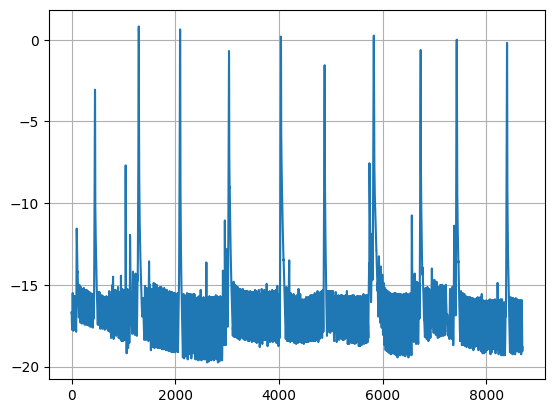

In [4]:
plt.plot(dados['temperature'])
plt.grid()

In [5]:
print('Temperatura Media:', round(dados['temperature'].mean(), 1))

Temperatura Media: -16.6


In [6]:
dados['time'] = pd.to_datetime(dados['time'], format='%Y-%m-%d %H:%M:%S')

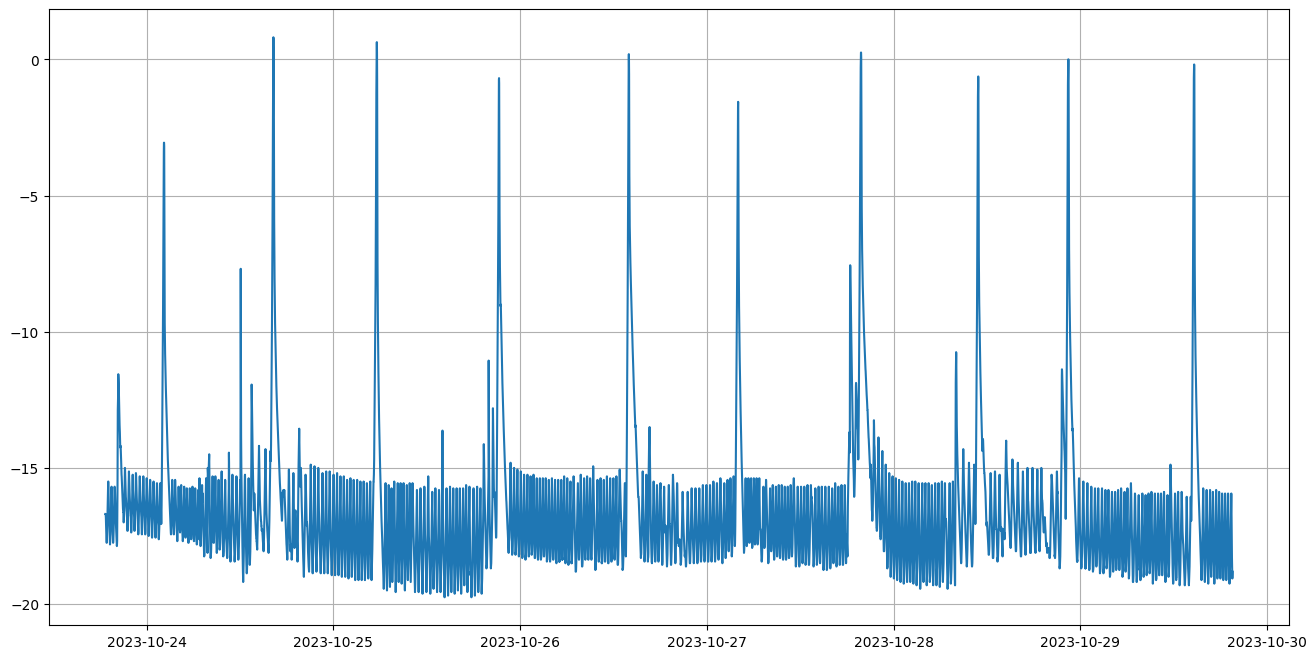

In [7]:
plt.figure(figsize=(16, 8))
plt.plot(dados['time'], dados['temperature'])
plt.grid()

In [8]:
picos, _ = find_peaks(dados['temperature'], height=-5)

In [9]:
print(picos)

[ 452 1296 2093 3036 4037 4880 5827 6731 7426 8396]


In [10]:
print('Quantidade de Picos:', len(picos))

Quantidade de Picos: 10


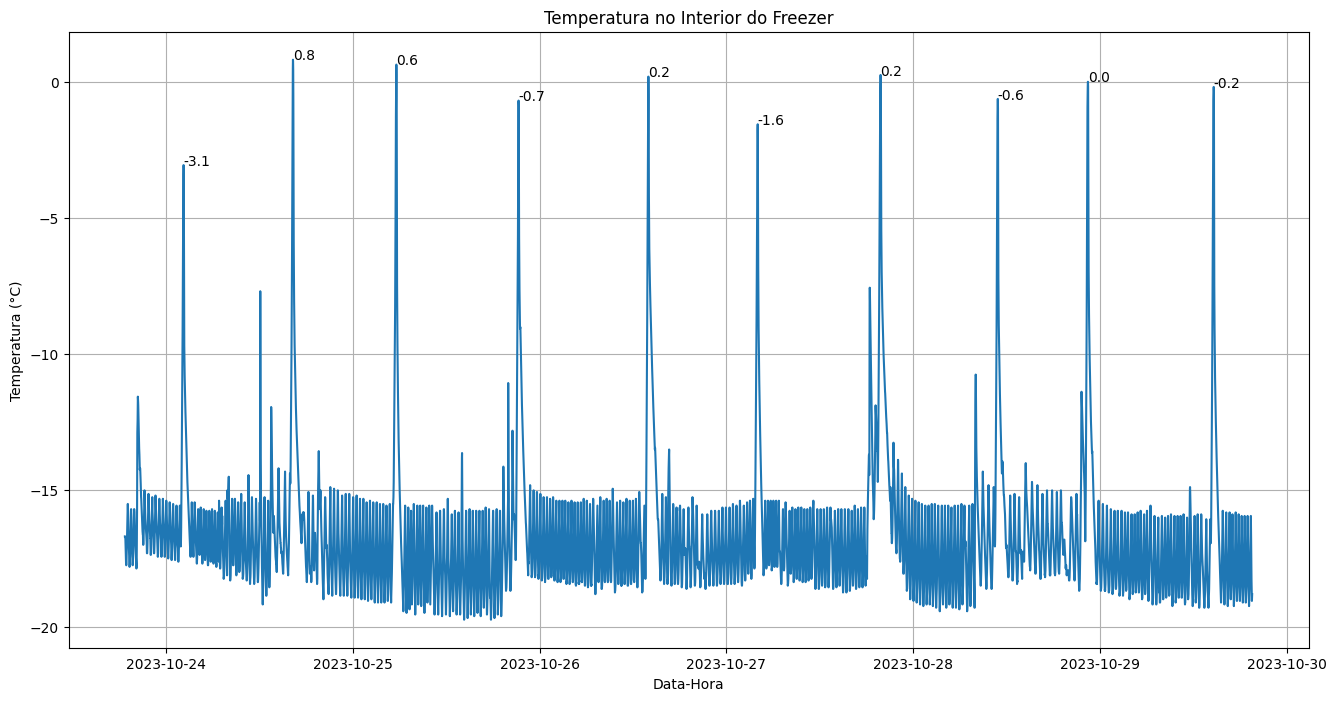

In [11]:
plt.figure(figsize=(16, 8))
plt.plot(dados['time'], dados['temperature'])
plt.title('Temperatura no Interior do Freezer')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Data-Hora')
plt.grid()
for pico in picos:
    plt.text(dados['time'][pico], dados['temperature'][pico], round(dados['temperature'][pico], 1))

In [12]:
periodos = []
for i in range(1, len(picos)):
    periodos.append((dados['time'][picos[i]] - dados['time'][picos[i - 1]]).total_seconds() / 3600)


In [15]:
print(periodos)

[14.066666666666666, 13.283333333333333, 15.716666666666667, 16.683333333333334, 14.05, 15.783333333333333, 15.066666666666666, 11.583333333333334, 16.166666666666668]


In [13]:
print('Periodo Minimo:', round(min(periodos), 1))
print('Periodo Maximo:', round(max(periodos), 1))
print('Periodo Medio:', round(sum(periodos) / len(periodos), 1))

Periodo Minimo: 11.6
Periodo Maximo: 16.7
Periodo Medio: 14.7
